In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Input parameters
START_PRICE  = 1500    # Starting price
STEP_PRICE   = 1500     # Price to increase in each row
END_PRICE    = 50000  # Price at the end of the table
ORDERS       = 30      #

In [21]:
def thai_withholding_tax(price):
    return price*0.03

In [22]:
def fastwork_commission(price):
    # Tier 1
    tier1 = min(price,10000) * 0.17
    # Tier 2
    tier2 = min(max(0,price-10000) * 0.12,4800)
    # Tier 3
    tier3 = max(0,price-50000) * 0.07
    
    return tier1+tier2+tier3

In [23]:
def total_cost(price):
    return thai_withholding_tax(price) + fastwork_commission(price)

In [85]:
def plot_heatmap(name,START_PRICE,STEP_PRICE,END_PRICE,ORDERS):
    price_matrix = [[i,j] for i in range(START_PRICE,END_PRICE,STEP_PRICE) for j in range(1,ORDERS)]
    df = pd.DataFrame(price_matrix, columns=['Price','Orders'])
    df['Total_Price'] = df['Price'] * df['Orders']
    df['Cost_Multiple'] = df['Price'].apply(total_cost) * df['Orders']
    df['Cost_Single'] = df['Total_Price'].apply(total_cost)
    df['Cost_Diff'] = df['Cost_Multiple'] - df['Cost_Single']
    df['Cost_Diff%'] = (df['Cost_Diff']/df['Total_Price'])
    df_pivot = pd.pivot_table(df,values='Cost_Diff%',index=['Price'],columns=['Orders'])
    plt.figure(figsize=(64, 36))
    sns.set(font_scale=2)
    sns.heatmap(df_pivot,annot=True,fmt=".1%",cbar=False)
    plt.savefig('heatmap_1500.png')

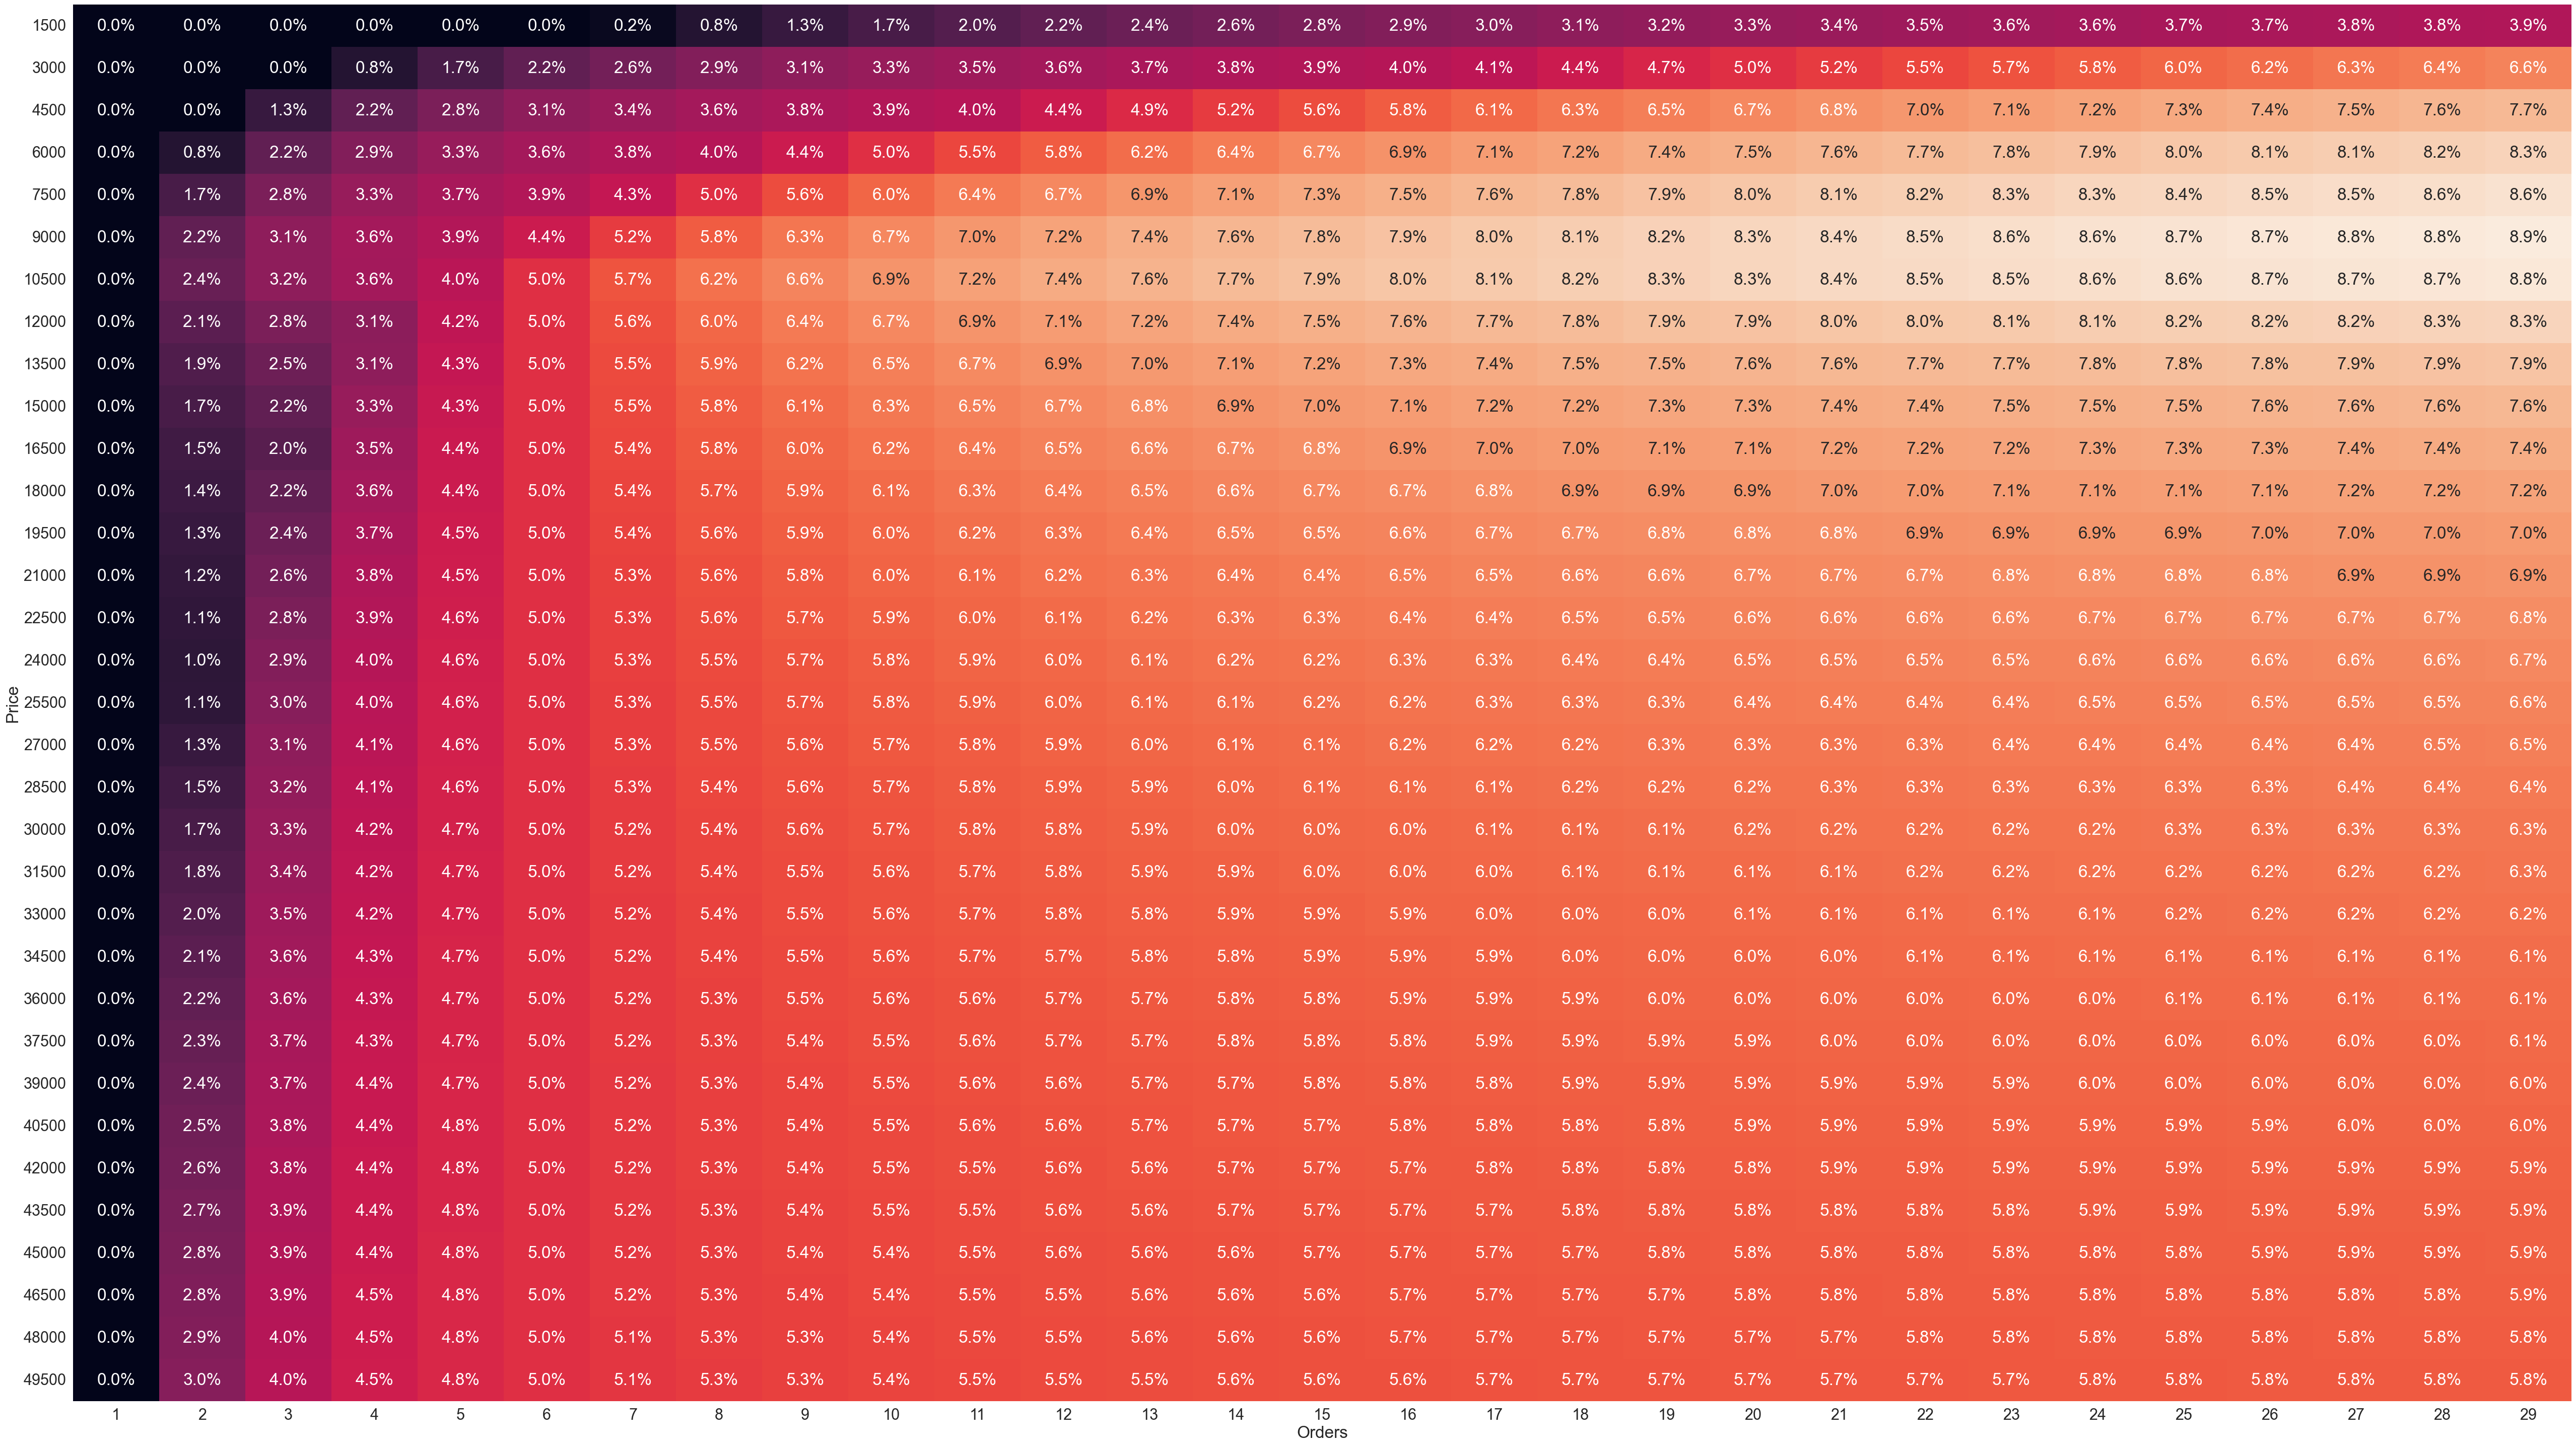

In [86]:
# Input parameters
NAME         = 'heatmap_1500.png'
START_PRICE  = 1500    # Starting price
STEP_PRICE   = 1500     # Price to increase in each row
END_PRICE    = 50000  # Price at the end of the table
ORDERS       = 30      #
plot_heatmap(NAME,START_PRICE,STEP_PRICE,END_PRICE,ORDERS)

In [ ]:
# Input parameters
NAME         = 'heatmap_2k.png'
START_PRICE  = 2000    # Starting price
STEP_PRICE   = 2000     # Price to increase in each row
END_PRICE    = 50000  # Price at the end of the table
ORDERS       = 25      #
plot_heatmap(NAME,START_PRICE,STEP_PRICE,END_PRICE,ORDERS)

In [ ]:
# Input parameters
NAME         = 'heatmap_1k.png'
START_PRICE  = 1000    # Starting price
STEP_PRICE   = 1000     # Price to increase in each row
END_PRICE    = 50000  # Price at the end of the table
ORDERS       = 50      #
plot_heatmap(NAME,START_PRICE,STEP_PRICE,END_PRICE,ORDERS)

In [ ]:
# Input parameters
NAME         = 'heatmap_5k.png'
START_PRICE  = 5000    # Starting price
STEP_PRICE   = 5000     # Price to increase in each row
END_PRICE    = 50000  # Price at the end of the table
ORDERS       = 10      #
plot_heatmap(NAME,START_PRICE,STEP_PRICE,END_PRICE,ORDERS)